In [1]:
import sys
# adding search_optimization_tools to the system path
sys.path.insert(0, '../')

In [2]:
import latexify
import random
import math
import numpy as np
from search_optimization_tools.algorithms.trajectory_based import SimulatedAnnealing
from search_optimization_tools.problems import ProblemBase, ContinuousFunctionBase

In [3]:
@latexify.with_latex
def simple_example(x):
    return (x-6)**2

simple_example_bounds = np.asarray([[0, 31]])
simple_example_obj = ContinuousFunctionBase(simple_example, simple_example_bounds)
simple_example

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1e4e640ae00>

In [4]:
# Adding debug = 1 to print initial and final solution
sa = SimulatedAnnealing(max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=1)

In [5]:
sa.run(simple_example_obj)

Simulated annealing is initialized:
current value = 151.8334869729351, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 5.8134592761565185e-08, curr temp:9.97938882337113e-05, curr best: sol: [5.99975889]


In [6]:
# Adding debug=2 (debug>1) for hand iteration tracing
sa_hand_iter = SimulatedAnnealing(max_iter=100, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=2)

In [7]:
sa_hand_iter.run(simple_example_obj)

Simulated annealing is initialized:
current value = 4.3506277763194054, current temp=1000
curr iter: 1, curr value: 0.12745387183508922, curr best value: 0.012620914873958578, curr temp:1000, curr best: sol: [5.88765715]
curr iter: 2, curr value: 38.91013760435638, curr best value: 0.012620914873958578, curr temp:900.0, curr best: sol: [5.88765715]
curr iter: 3, curr value: 5.94463193062847, curr best value: 0.0008955319252348528, curr temp:810.0, curr best: sol: [5.97007456]
curr iter: 4, curr value: 11.855627666381556, curr best value: 3.10371123475251e-05, curr temp:729.0000000000001, curr best: sol: [5.9944289]
curr iter: 5, curr value: 10.473631027522183, curr best value: 3.10371123475251e-05, curr temp:656.1, curr best: sol: [5.9944289]
curr iter: 6, curr value: 143.1355243454917, curr best value: 3.10371123475251e-05, curr temp:590.4900000000001, curr best: sol: [5.9944289]
curr iter: 7, curr value: 0.4750124753690919, curr best value: 3.10371123475251e-05, curr temp:531.441, cu

global minimum: x = 5.9991, f(x) = 0.0000


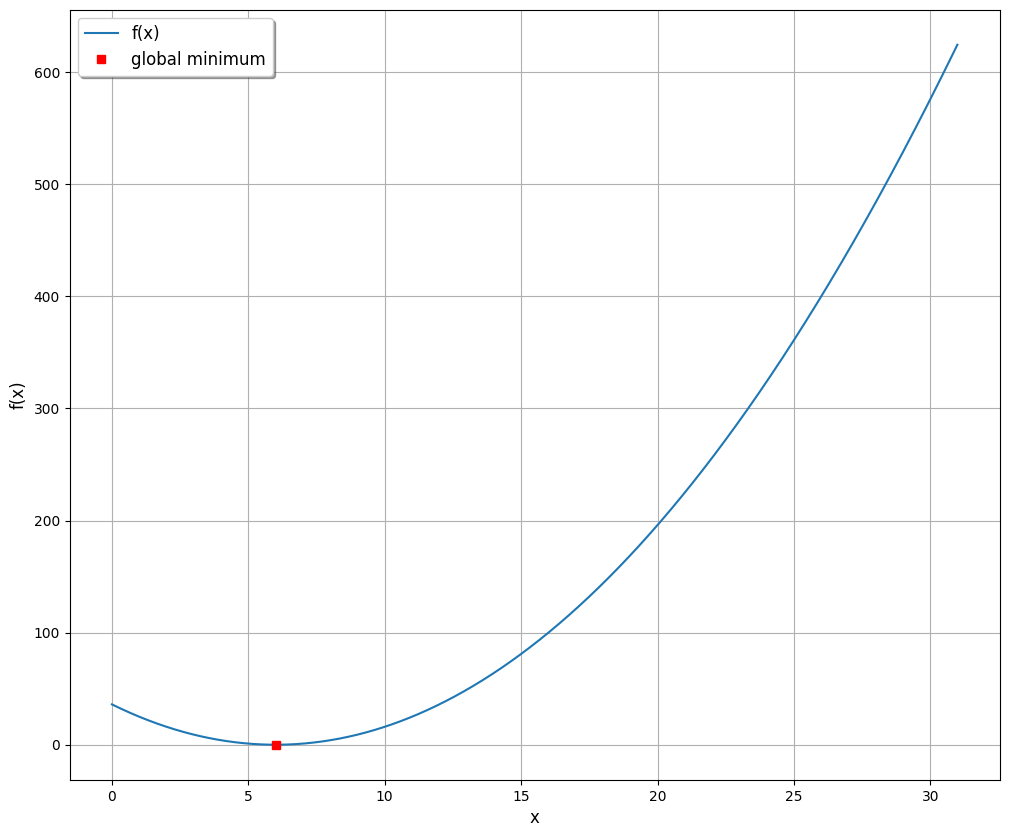

In [8]:
simple_example_obj.plot(sa_hand_iter.s_best)

In [9]:
def Bohachevsky(x_1, x_2):
    return x_1**2 +2*(x_2**2)-0.3*np.cos(3*np.pi*x_1)-0.4*np.cos(4*np.pi*x_2)+0.7

Bohachevsky_bounds = np.asarray([[-100, 100], [-100, 100]])
Bohachevsky_obj = ContinuousFunctionBase(Bohachevsky, Bohachevsky_bounds, 5)

In [10]:
sa.run(Bohachevsky_obj)

Simulated annealing is initialized:
current value = 10471.57862005119, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.010936590097110233, curr temp:9.97938882337113e-05, curr best: sol: [0.00607336 0.01763883]


global minimum: x = 0.0061, 0.0176, f(x) = 0.0109


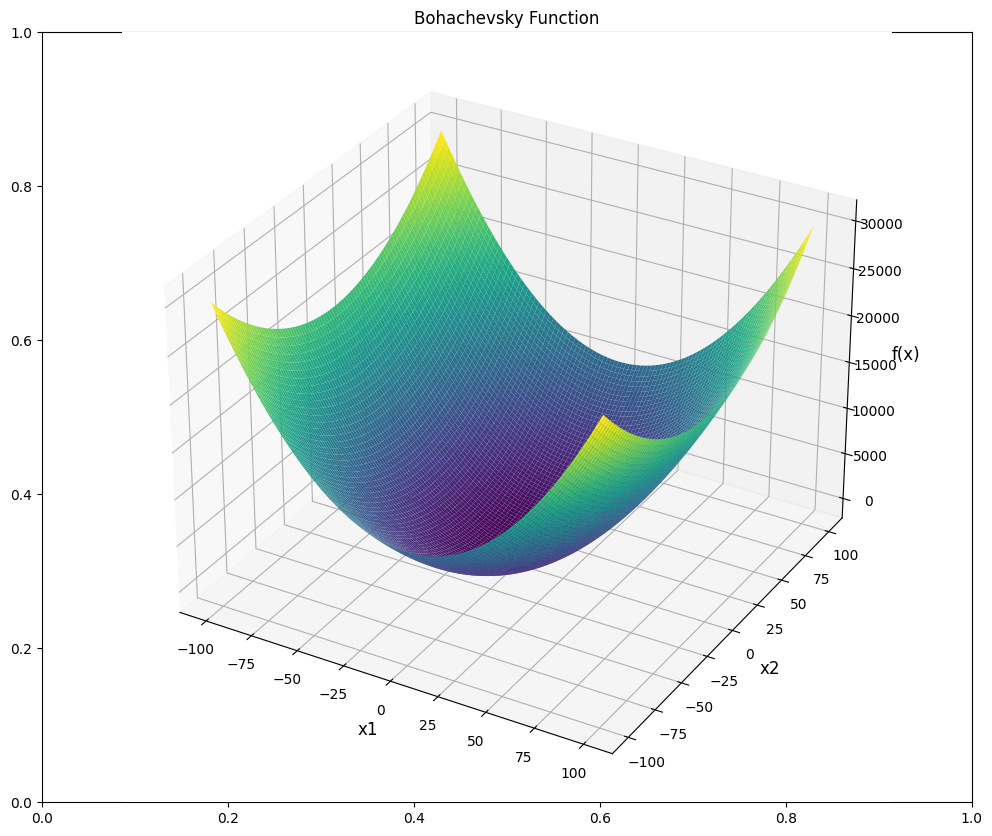

In [11]:
Bohachevsky_obj.plot(sa.s_best,'Bohachevsky Function')

In [12]:
@latexify.with_latex
def bukin(x_1, x_2):
    return 100*math.sqrt(abs(x_2-0.01*x_1**2)) + 0.01 * abs(x_1 + 10)

bukin_bounds = np.asarray([[-15, -5], [-3, 3]])
bukin_obj = ContinuousFunctionBase(bukin, bukin_bounds, 5)
bukin

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1e4e69d69e0>

In [13]:
sa.run(bukin_obj)

Simulated annealing is initialized:
current value = 148.7241433532644, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 2.4831007222378734, curr temp:9.97938882337113e-05, curr best: sol: [-5.7949832   0.33641418]


global minimum: x = -5.7950, 0.3364, f(x) = 2.4831


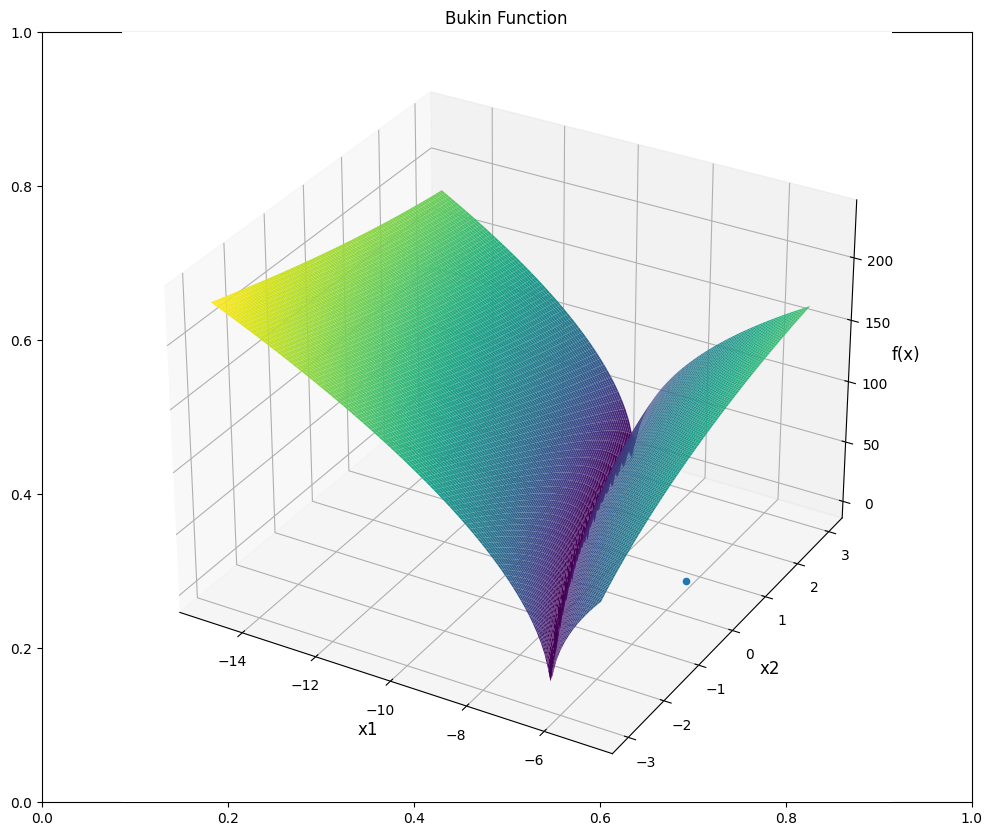

In [14]:
bukin_obj.plot(sa.s_best,'Bukin Function')

In [15]:
pi = math.pi
@latexify.with_latex
def gramacy_and_lee(x):
    return math.sin(10*pi*x)/(2*x) + (x-1)**4

gramacy_and_lee_bounds = np.asarray([[0.5, 2.5]])
gramacy_and_lee_obj = ContinuousFunctionBase(gramacy_and_lee, gramacy_and_lee_bounds, .1)
gramacy_and_lee

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x1e4e97986d0>

In [16]:
sa.run(gramacy_and_lee_obj)

Simulated annealing is initialized:
current value = 0.5798025427865061, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: -0.8690111345066478, curr temp:9.97938882337113e-05, curr best: sol: [0.54856448]


global minimum: x = 0.5486, f(x) = -0.8690


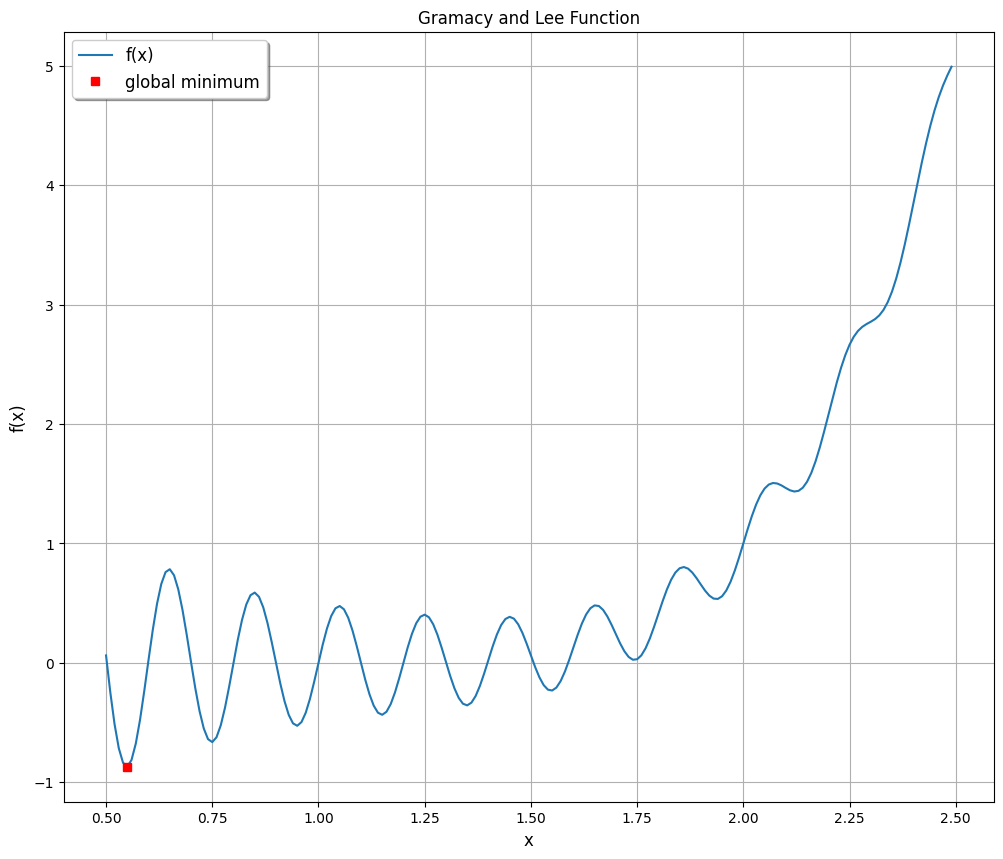

In [17]:
gramacy_and_lee_obj.plot(sa.s_best,'Gramacy and Lee Function')

In [18]:
def griewank(*x):
    x = np.asarray(x)
    return np.sum(x**2/4000) - np.prod(np.cos(x/np.sqrt(np.asarray(range(1, len(x)+1))))) + 1

griewank_bounds = np.asarray([[-600, 600]])
griewank_1d=ContinuousFunctionBase(griewank, griewank_bounds, 10)

In [19]:
sa.run(griewank_1d)

Simulated annealing is initialized:
current value = 5.670271031653759, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 5.17573217617695e-09, curr temp:9.97938882337113e-05, curr best: sol: [0.00010172]


global minimum: x = 0.0001, f(x) = 0.0000


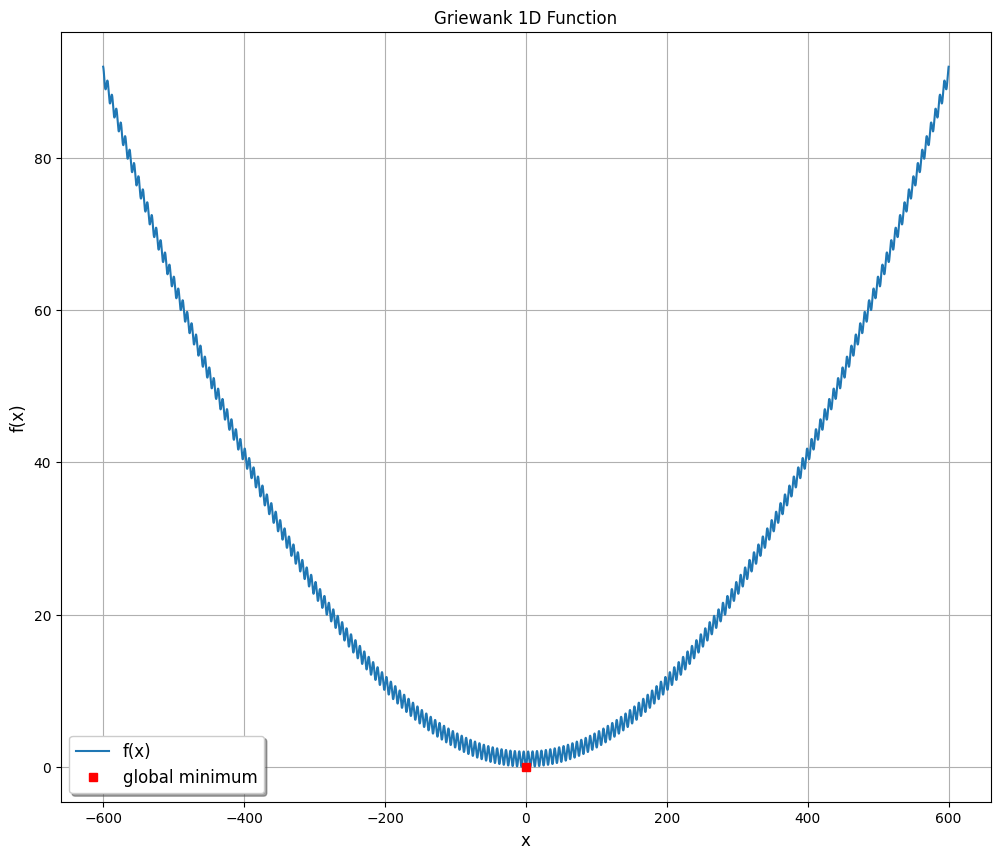

In [20]:
griewank_1d.plot(sa.s_best,'Griewank 1D Function')

In [21]:
griewank_bounds_2d = np.asarray([[-600, 600]]*2)
griewank_2d=ContinuousFunctionBase(griewank, griewank_bounds_2d, (griewank_bounds_2d[:, 1] - griewank_bounds_2d[:, 0])/10)

In [22]:
sa.run(griewank_2d)

Simulated annealing is initialized:
current value = 4.164322672021024, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.09747580694944946, curr temp:9.97938882337113e-05, curr best: sol: [9.07135378 4.64641234]


global minimum: x = 9.0714, 4.6464, f(x) = 0.0975


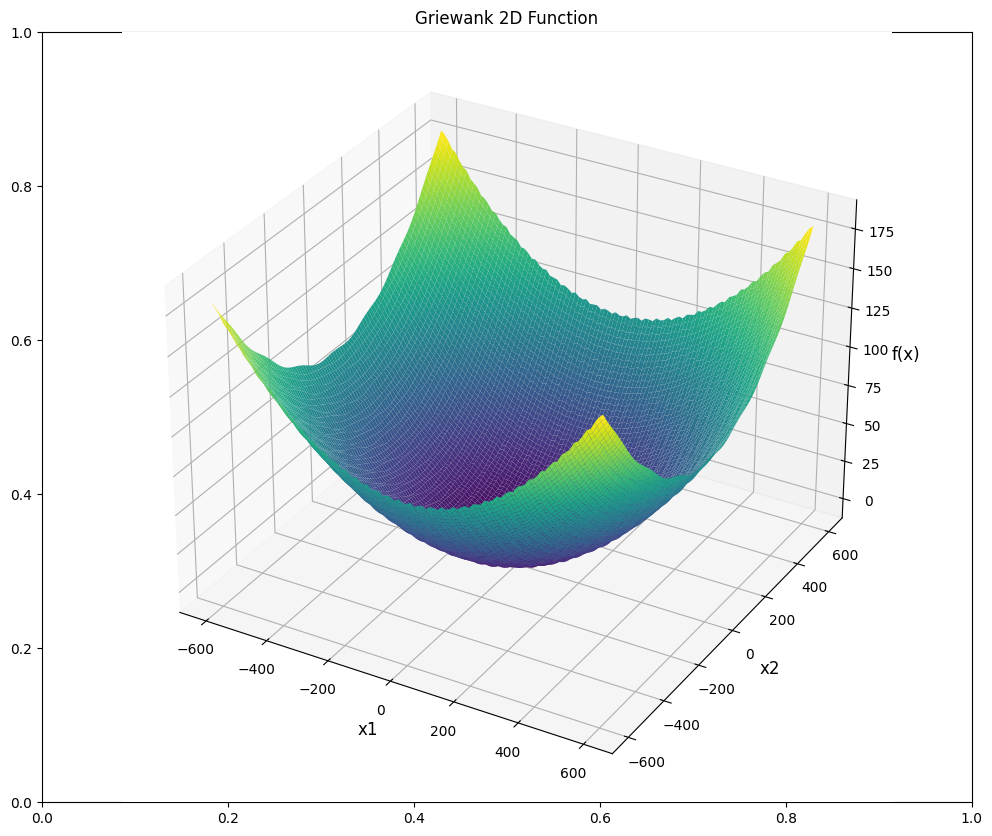

In [23]:
griewank_2d.plot(sa.s_best,'Griewank 2D Function')

In [24]:
griewank_bounds_3d = np.asarray([[-600, 600]]*3)
griewank_3d=ContinuousFunctionBase(griewank, griewank_bounds_3d, (griewank_bounds_3d[:, 1] - griewank_bounds_3d[:, 0])/10)

In [25]:
# Changing the parameters for SA for more complex problem
sa = SimulatedAnnealing(max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='linear_inverse', cooling_alpha=0.9, debug=1)

In [26]:
sa.run(griewank_3d)

Simulated annealing is initialized:
current value = 99.64387468041122, current temp=10000
Simulated Annealing is done: 
curr iter: 10001, curr best value: 0.025677033837910423, curr temp:1.1109876680368849, curr best: sol: [3.20255475 0.05653688 5.71365214]
